# load models

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from fastai.text import *
from segal_utils import NextWord
wiki_path = "data/wiki/"
amit_path = "data/amit/"

In [5]:
wiki = load_learner(wiki_path, "wiki-heb.pkl")
learn_amit = load_learner(amit_path, "learn_amit.pkl")
classification_amit = load_learner(amit_path, "classification_amit.pkl")

## predict word with 2 models

In [22]:
sentence = "ראש הממשלה בנימין נתניהו"
predicter = NextWord(learn_amit, sentence, classification_amit)

In [35]:
predicter.generate(40)

ראש הממשלה בנימין נתניהו נתניהו שולל לחלוטין את האמירה שיש הבחנה בין העוטף לבין תל אביב . משקיע שממילא זה עתה מטרידה כל כך הרבה מנדטים . ולהיזכר יום יום הבחירות הקודמות , והליכוד 22 שרק כדי לזכות הקודמות .


seem very good!

## word map

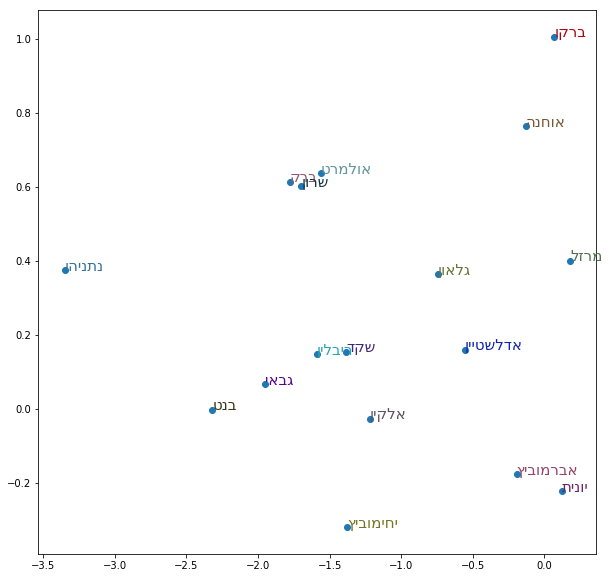

In [40]:
c = learn_amit.model[0].encoder.weight
c = c.pca(2)

text = "נתניהו יחימוביץ גבאי אלקין אדלשטיין ריבלין גלאון אוחנה ברק בנט שקד אברמוביץ יונית מרזל ברקו אולמרט שרון"
text = text.split(" ")
ids = learn_amit.data.vocab.numericalize(text)
X = [c[i].cpu().detach().numpy()[0] for i in ids]
Y = [c[i].cpu().detach().numpy()[1] for i in ids]

corrcet = lambda t: "".join([t[len(t) - i - 1] for i in range(len(t))])
plt.figure(figsize=(10,10))
plt.scatter(X, Y)
for i, x, y in zip(text, X, Y):
    plt.text(x,y,corrcet(i), color=np.random.rand(3)*0.7, fontsize=15)
plt.show()

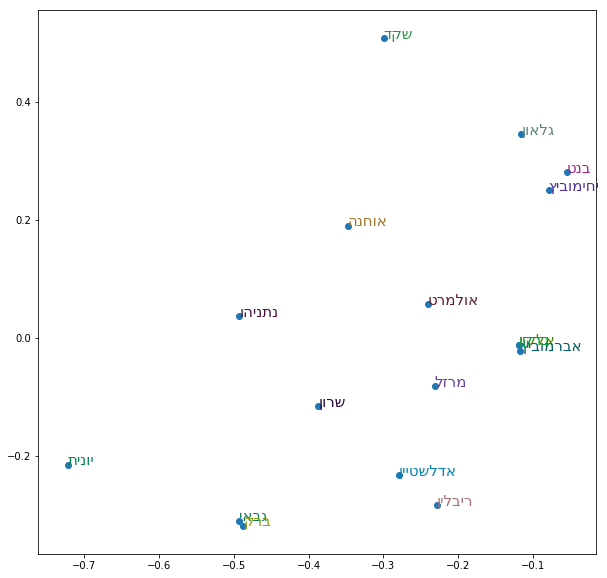

In [48]:
c = wiki.model[0].encoder.weight

text = "נתניהו יחימוביץ גבאי אלקין אדלשטיין ריבלין גלאון אוחנה ברק בנט שקד אברמוביץ יונית מרזל ברקו אולמרט שרון"
text = text.split(" ")
ids = wiki.data.vocab.numericalize(text)
X = [c[i].unsqueeze(1).pca(2).cpu().detach().numpy()[0] for i in ids]
Y = [c[i].unsqueeze(1).pca(2).cpu().detach().numpy()[1] for i in ids]

corrcet = lambda t: "".join([t[len(t) - i - 1] for i in range(len(t))])
plt.figure(figsize=(10,10))
plt.scatter(X, Y)
for i, x, y in zip(text, X, Y):
    plt.text(x,y,corrcet(i), color=np.random.rand(3)*0.7, fontsize=15)
plt.show()